In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datach.csv')

In [3]:
data.head()

,Unnamed: 0,country,age,new_user,source,total_pages_visited,converted
0,0,UK,25,1,Ads,1,0
1,1,US,23,1,Seo,5,0
2,2,US,28,1,Seo,4,0
3,3,China,39,1,Seo,5,0
4,4,US,30,1,Seo,6,0


In [4]:
data.describe(include='all')

,Unnamed: 0,country,age,new_user,source,total_pages_visited,converted
count,316200.000000,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,NaN,4,NaN,NaN,3,NaN,NaN
top,NaN,US,NaN,NaN,Seo,NaN,NaN
freq,NaN,178092,NaN,NaN,155040,NaN,NaN
mean,158099.500000,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,91279.221896,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,0.000000,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,79049.750000,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,158099.500000,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,237149.250000,NaN,36.000000,1.000000,NaN,7.000000,0.000000


#DATA'S STUDY#

In [5]:
data = data.drop('Unnamed: 0', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
data.isna().value_counts()

country  age    new_user  source  total_pages_visited  converted
False    False  False     False   False                False        316200
dtype: int64

**VARIATION**

In [8]:
data.std().value_counts()

0.176685    1
8.271802    1
0.464331    1
3.341104    1
dtype: int64

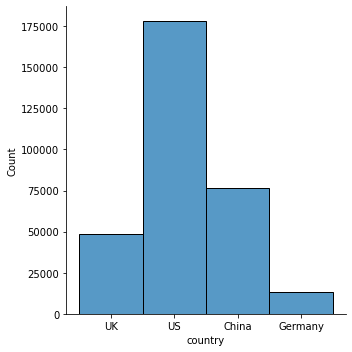

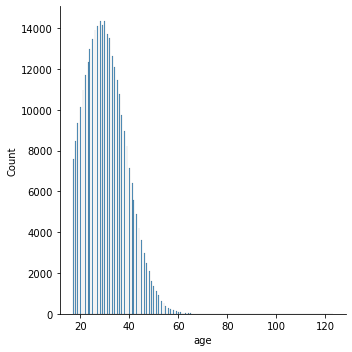

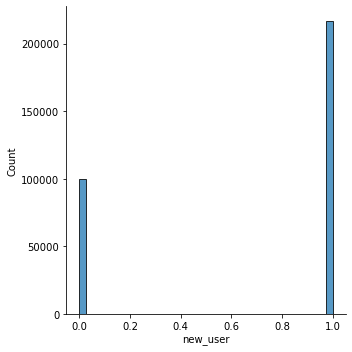

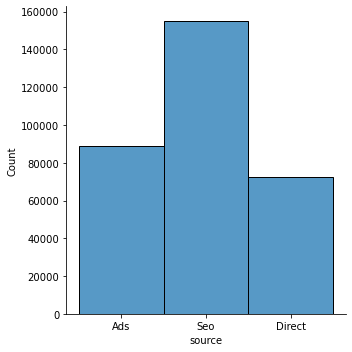

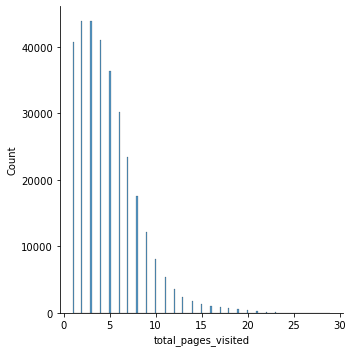

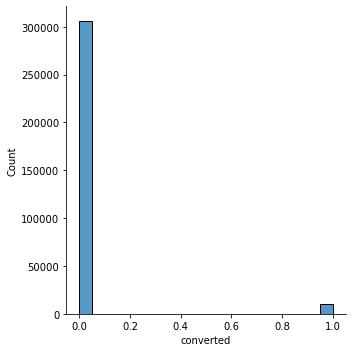

In [9]:
for col in data.columns:
    sns.displot(data[col])

In [10]:
data.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000


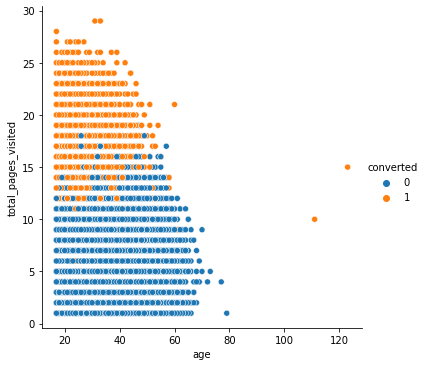

In [11]:
sns.relplot(x='age',y='total_pages_visited',hue='converted',data=data)

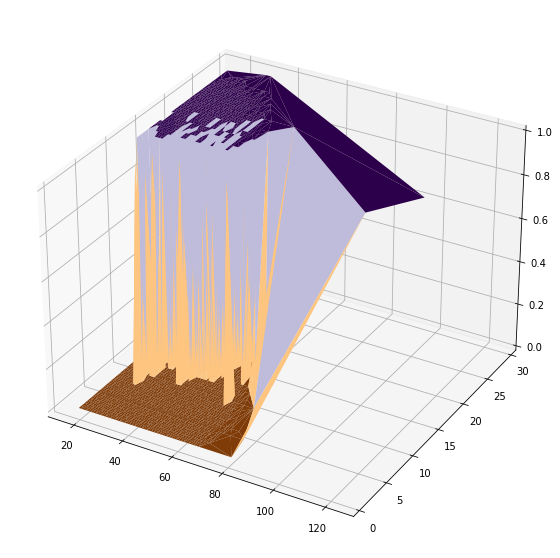

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(data.age,data.total_pages_visited,data.converted,cmap='PuOr')
plt.show()

In [13]:
data.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

CONCLUSION
* No missing values
* No uniques values
* No correlation between features
* good relation between Age/pages and the target
* target is very unbalance

# PREPOCESSING AND REGRESSION LINEAR MODEL

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [15]:
#data =data[(data.age < 45) & (data.total_pages_visited < 29)]
data =data[(data["age"] < (data.age.mean()+(data.age.std()*1.8)))]
#data =data[data["total_pages_visited"] < 28]

data['country'] = data['country'].apply(lambda x: x.replace('Germany','Europe'))
data['country'] = data['country'].apply(lambda x: x.replace('UK','Europe'))


In [16]:
#data.total_pages_visited.mean()+(data.total_pages_visited.std()*1.8)

In [17]:
ts = 0.2

*test with only age/total_pages*

In [18]:
X = data[['age','total_pages_visited']]
y = data['converted']

In [19]:
X = X.values
y = y.tolist()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=ts,random_state=0,stratify=y)

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [24]:
print("Accuracy on training set : ", accuracy_score(y_train, y_pred_train))
print("Accuracy on test set : ", accuracy_score(y_test, y_pred_test))

Accuracy on training set :  0.9829951474058564
Accuracy on test set :  0.9827503115911923


In [25]:
print("f1_score on training set : ", f1_score(y_train, y_pred_train))
print("f1_score on test set : ", f1_score(y_test, y_pred_test))

f1_score on training set :  0.7109667396370313
f1_score on test set :  0.7066139061616732


*test with addition country*

In [26]:
X = data[['age','total_pages_visited','country']]
y = data['converted']

In [27]:
X = X.values
y = y.tolist()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=ts,random_state=0,stratify=y)

In [29]:
ohe = OneHotEncoder()
sc = StandardScaler()

In [30]:
ct = make_column_transformer(
        (ohe,[2]),
        (sc,[0,1]),
        remainder ='passthrough')

In [31]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [33]:
print("Accuracy on training set : ", accuracy_score(y_train, y_pred_train))
print("Accuracy on test set : ", accuracy_score(y_test, y_pred_test))

Accuracy on training set :  0.9841833682321268
Accuracy on test set :  0.9840465309513918


In [34]:
print("f1_score on training set : ", f1_score(y_train, y_pred_train))
print("f1_score on test set : ", f1_score(y_test, y_pred_test))

f1_score on training set :  0.7344632768361582
f1_score on test set :  0.7336293007769146


*test with addition new_user*

In [35]:
X = data[['age','total_pages_visited','country','new_user']]
y = data['converted']

In [36]:
X = X.values
y = y.tolist()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=ts,random_state=0,stratify=y)

In [38]:
ohe = OneHotEncoder()
sc = StandardScaler()

In [39]:
ct = make_column_transformer(
        (ohe,[2,3]),
        (sc,[0,1]),
        remainder ='passthrough')

In [40]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [42]:
print("Accuracy on training set : ", accuracy_score(y_train, y_pred_train))
print("Accuracy on test set : ", accuracy_score(y_test, y_pred_test))

Accuracy on training set :  0.9857413500847542
Accuracy on test set :  0.9853593685085168


In [43]:
print("f1_score on training set : ", f1_score(y_train, y_pred_train))
print("f1_score on test set : ", f1_score(y_test, y_pred_test))

f1_score on training set :  0.7648026315789473
f1_score on test set :  0.7598800763150722


<AxesSubplot:>

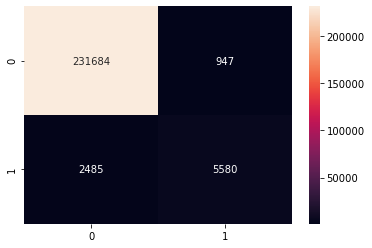

In [44]:
from sklearn.metrics import confusion_matrix
y_pred_train = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

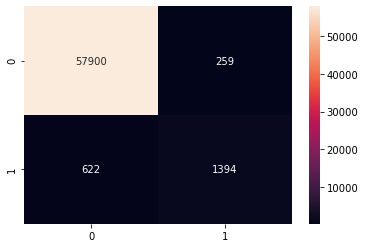

In [45]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")

In [46]:
from sklearn.model_selection import GridSearchCV

cvs=LogisticRegression()
params = {'C':[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(cvs, params, cv = 10,scoring='f1')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [47]:
model = grid.best_estimator_

In [48]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [49]:
print("Accuracy on training set : ", accuracy_score(y_train, y_pred_train))
print("Accuracy on test set : ", accuracy_score(y_test, y_pred_test))

Accuracy on training set :  0.9857413500847542
Accuracy on test set :  0.9853593685085168


In [50]:
print("f1_score on training set : ", f1_score(y_train, y_pred_train))
print("f1_score on test set : ", f1_score(y_test, y_pred_test))

f1_score on training set :  0.7648026315789473
f1_score on test set :  0.7598800763150722


In [51]:
from sklearn.model_selection import learning_curve
import numpy as np

In [52]:
N,train_scores, valid_scores = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1, 10),cv=10)

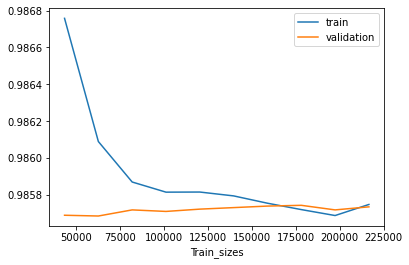

In [53]:
plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,valid_scores.mean(axis=1),label='validation')
plt.xlabel('Train_sizes')
plt.legend()

In [54]:
N,train_scores, valid_scores = learning_curve(model, X_test, y_test, train_sizes = np.linspace(0.2, 1, 10),cv=10)

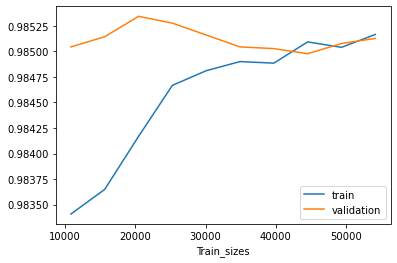

In [55]:
plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,valid_scores.mean(axis=1),label='validation')
plt.xlabel('Train_sizes')
plt.legend()

**Conclusion**<br/>
The model work but, we don't reach a satisfactory result. <br/>
the positive in the Target which are too low. <br/>
The train set need more features/datas<br/>
Let's try oversampling to avoid this biais.

**UPSAMPLING MODEL**

In [56]:
data.shape

(300871, 6)

*SMOTE OVERSAMPLING*

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state=0,sampling_strategy=0.06,k_neighbors=2)

X_train_s,y_train_s = sm.fit_resample(X_train, y_train)


In [59]:
cvs=LogisticRegression()
params = {'C':[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(cvs, params, cv = 10,scoring='f1')
grid.fit(X_train_s,y_train_s)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [60]:
model = grid.best_estimator_

In [61]:

model.fit(X_train_s,y_train_s)
y_pred_train = model.predict(X_train_s)
y_pred_test = model.predict(X_test)

In [62]:
print("Accuracy on training set : ", accuracy_score(y_train_s, y_pred_train))
print("Accuracy on test set : ", accuracy_score(y_test, y_pred_test))

Accuracy on training set :  0.9794231673885185
Accuracy on test set :  0.9844453676776069


In [63]:
print("f1_score on training set : ", f1_score(y_train_s, y_pred_train))
print("f1_score on test set : ", f1_score(y_test, y_pred_test))

f1_score on training set :  0.8048611645258057
f1_score on test set :  0.7623158963941087


<AxesSubplot:>

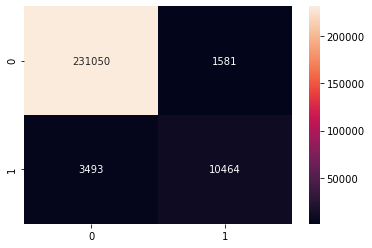

In [64]:
cm = confusion_matrix(y_train_s, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

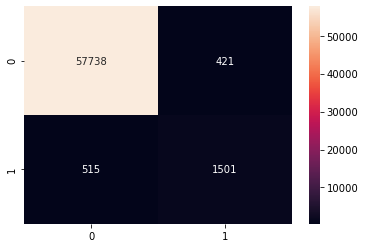

In [65]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")

In [66]:
N,train_scores, valid_scores = learning_curve(model, X_train_s, y_train_s, train_sizes = np.linspace(0.2, 1, 10),cv=10)

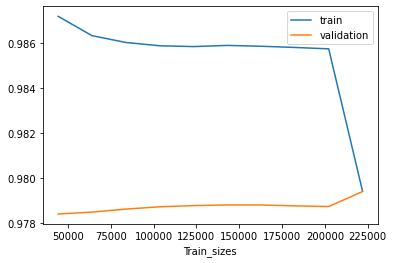

In [67]:
plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,valid_scores.mean(axis=1),label='validation')
plt.xlabel('Train_sizes')
plt.legend()

*In this case (conbinaison) there are overfitting*

**Conclusion and Recommendation**

The model with SMOTE oversampling seem to work a little bit better. The critical features for converted people, seems to be age and total pages visited, <br/>
and the lurning curve show us, we will need more datas to improve the predict model.<br/>
to improve the model we recommand:
*  more datas collect to have a better predict
* collect more differents features to give better model's performance<br/>
<br/>
to improve the converted rate you should:<br/>
<br/>
* adjust pages to attrack more people between 20/40 years'old
* improve or make a fidelity program to increase the rate of old user
